In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pickle

In [3]:
folder = '/Users/donquixote/Documents/Public-DSC291/hw4/runtime_scores/'
pickle_filename = folder+'model_JAMSTEC2_test_JAMSTEC2_scores.pkl'
with open(pickle_filename, "rb") as f: 
    (features, label, scores, weights) = pickle.load(f) 

Text(0.5, 0, 'Datapoints')

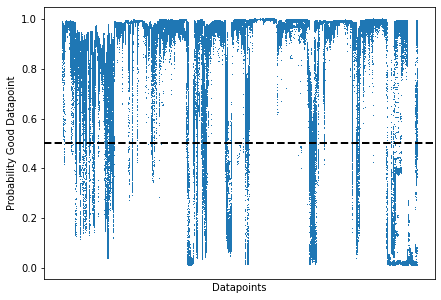

In [28]:
x = np.arange(len(scores))
fig = plt.figure(figsize = (7, 5))
plt.plot(x, scores, ',')
plt.axhline(0.5, color = 'k', linewidth = 2, linestyle = '--')
plt.xticks([])
plt.ylabel('Probability Good Datapoint')
plt.xlabel('Datapoints')

In [48]:
thresh = 0.5
print('Number of point classified good {:d}'.format(len(scores[scores > thresh])))
print('Number of point classified bad {:d}'.format(len(scores[scores < thresh])))
acc = np.sum(label == (scores > 0.5)) / label.shape[0]
print('Accuracy: {:1.2f}'.format(acc))

Number of point classified good 700816
Number of point classified bad 96887
Accuracy: 0.95


Area under curve:  0.9968586321166448


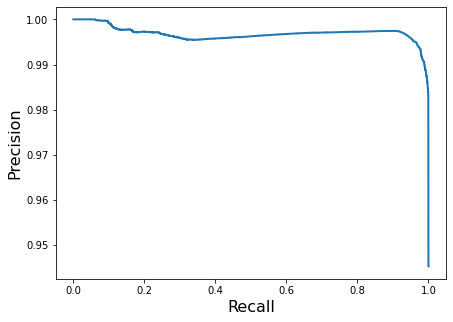

In [55]:
from sklearn.metrics import auc
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import roc_curve

# compute auprc
precision, recall, _ = precision_recall_curve(label, scores, pos_label=1)
fig = plt.figure(figsize = (7, 5))
plt.plot(recall, precision, lw = 2)
plt.xlabel('Recall', fontsize = 16)
plt.ylabel('Precision', fontsize = 16)
print('Area under curve: ', auc(recall, precision))

Area under curve:  0.9773445363651734


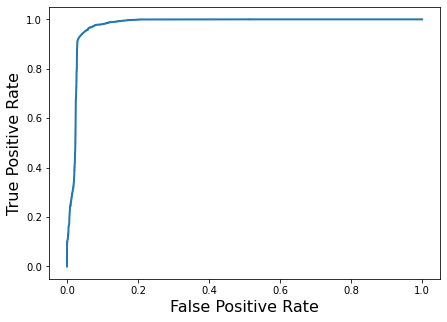

In [57]:
fig = plt.figure(figsize = (7, 5))
fpr, tpr, _ = roc_curve(label, scores, pos_label=1)
plt.plot(fpr, tpr, lw = 2)
plt.xlabel('False Positive Rate', fontsize = 16)
plt.ylabel('True Positive Rate', fontsize = 16)
print('Area under curve: ', auc(fpr, tpr))

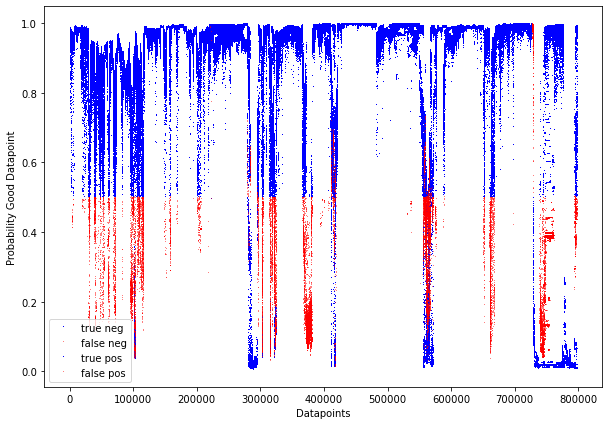

In [32]:
true_neg = np.logical_and(scores < thresh, label < thresh)
true_pos = np.logical_and(scores > thresh, label > thresh)
false_neg = np.logical_and(scores < thresh, label > thresh)
false_pos = np.logical_and(scores > thresh, label < thresh)

fig = plt.figure(figsize = (10, 7))
plt.plot(x[true_neg], scores[true_neg], 'b,', label = 'true neg')
plt.plot(x[false_neg], scores[false_neg], 'r,',alpha = 0.5, label = 'false neg') 
plt.plot(x[true_pos], scores[true_pos], 'b,', label = 'true pos') 
plt.plot(x[false_pos], scores[false_pos], 'r,',alpha = 0.5, label = 'false pos')
plt.ylabel('Probability Good Datapoint')
plt.xlabel('Datapoints')
plt.legend()

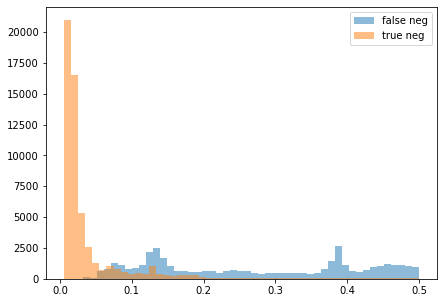

In [23]:
fig = plt.figure(figsize = (7, 5))
plt.hist(scores[false_neg], bins = 50, alpha = 0.5, label = 'false neg')
plt.hist(scores[true_neg], bins = 50, alpha = 0.5, label = 'true neg')
plt.legend()

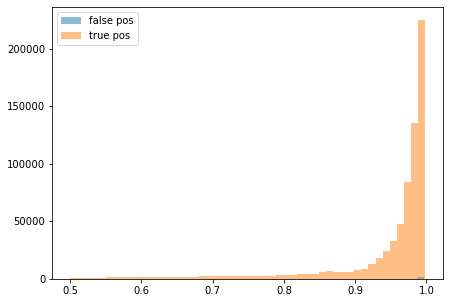

In [60]:
fig = plt.figure(figsize = (7, 5))
plt.hist(scores[false_pos], bins = 50, alpha = 0.5, label = 'false pos')
plt.hist(scores[true_pos], bins = 50, alpha = 0.5, label = 'true pos')
plt.legend()